<a href="https://colab.research.google.com/github/neonkitchen/CheXpert-Keras/blob/master/Capstone_v4_condensenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task list

- [x] Data
    - [x] preview
    - [x] link info 
    - [x] generator
- Model

In [0]:
# Ensuring run time is GPU (if not: Runtime -> Change run type)

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
#accessing Files on Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!ls '/content/gdrive/My Drive/Colab Notebooks/'

'Capstone Skeleton.ipynb'
'Capstone Skeleton v2.ipynb'
'Capstone v4_condensenet.ipynb'
'Capstone v4.ipynb'
'Convnets - Course 2 - Part 4 - Lesson 2 - Notebook.ipynb'
'Copy of Capstone Skeleton v3.ipynb'
'Copy of Course 2 - Part 4 - Lesson 2 - Notebook.ipynb'
'Copy of Exercise 1 - House Prices - Question.ipynb'
'Copy of Inception v3 Transfer Learning.ipynb'
'Copy of Simple Implementation of Densely Connected Neural Networks.ipynb'
'Full Cats vs Dog with Augmentation.ipynb'
 Horse-or-Human-NoValidation.ipynb
'Inception v3 Transfer Learning.ipynb'
'Intro to TF'
'KM_Cluster-v1 -1.3.ipynb'
 pytorch_vision_densenet.ipynb
 rock_paper_scissors.ipynb
 Untitled0.ipynb
 Untitled1.ipynb


In [0]:
#checkinf OS, processors & RAM info
!cat /proc/version
!cat /proc/cpuinfo
!cat /proc/meminfo

In [0]:
!nvidia-smi

Fri Jul  5 08:14:58 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    61W / 149W |     71MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# Using latest version of TF

#!pip install tensorflow==2.0.0b0
#-alpha0 

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import keras
print(keras.__version__)

2.2.4


In [0]:
pip uninstall keras
pip install keras==version_number

In [0]:
#!pip uninstall keras-preprocessing
#!pip install git+https://github.com/keras-team/keras-preprocessing.git

In [0]:
import tensorflow as tf
print(tf.__version__)

1.14.0


# downloading zip file containing data

# unzipping to temp directly on virtual machine

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [0]:
# 11 GB CheXpert sample; 3m 17s 

!wget --no-check-certificate \
   http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip \
    -O /tmp/CheXpert-v1.0-small.zip
  
  
# 439 GB full CheXpert version ; ? 
  
#!wget --no-check-certificate \
    #http://download.cs.stanford.edu/deep/CheXpert-v1.0.zip \
    #-O /tmp/CheXpert-v1.0.zip

--2019-07-05 08:15:03--  http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip
Resolving download.cs.stanford.edu (download.cs.stanford.edu)... 171.64.64.22
Connecting to download.cs.stanford.edu (download.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11557753157 (11G) [application/zip]
Saving to: ‘/tmp/CheXpert-v1.0-small.zip’

/tmp/CheXpert-v1.0- 100%[===================>]  10.76G  19.4MB/s    in 9m 24s  

2019-07-05 08:24:27 (19.5 MB/s) - ‘/tmp/CheXpert-v1.0-small.zip’ saved [11557753157/11557753157]



In [0]:
#  OS library  gives you access to the file system & zipfile library 
# allows you to unzip the data


import os
import zipfile

# 11 GB CheXpert sample

local_zip = '/tmp/CheXpert-v1.0-small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp') #loacation zip file extracted to

# 439 GB full CheXpert version 

#local_zip = '/tmp/CheXpert-v1.0.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp/CheXpert-v1.0') #loacation zip file extracted to


zip_ref.close()

In [0]:
# Project working directory
working_dir = os.listdir('/tmp/CheXpert-v1.0-small/')

# Directory with our training data
train_dir = os.path.join('/tmp/CheXpert-v1.0-small/train/')

# Directory with our validation data
validation_dir = os.path.join('/tmp/CheXpert-v1.0-small/valid/')



In [0]:
train_names = os.listdir(train_dir)
print(train_names[:10])

validation_names = os.listdir(validation_dir)
print(validation_names[:10])

['patient14684', 'patient58974', 'patient08108', 'patient33409', 'patient37827', 'patient41757', 'patient54685', 'patient00593', 'patient52317', 'patient20386']
['patient64655', 'patient64624', 'patient64669', 'patient64679', 'patient64720', 'patient64605', 'patient64559', 'patient64686', 'patient64653', 'patient64573']


# Engineering labels

In [0]:
import pandas as pd

train_label_raw= pd.read_csv('/tmp/CheXpert-v1.0-small/train.csv')
valid_label_raw = pd.read_csv('/tmp/CheXpert-v1.0-small/valid.csv')

train_label= pd.read_csv('/tmp/CheXpert-v1.0-small/train.csv')
valid_label = pd.read_csv('/tmp/CheXpert-v1.0-small/valid.csv')


train_label=train_label_raw[list(train_label.columns)[5:]]
valid_label=valid_label_raw[list(valid_label.columns)[5:]]


train_label.insert(0, 'Path', '/tmp/' + train_label_raw['Path'])
valid_label.insert(0, 'Path', '/tmp/' + valid_label_raw['Path'])

#train_label['Path']='/tmp/' + train_label_raw['Path']
#valid_label['Path']='/tmp/' + valid_label_raw['Path']

train_label.fillna(0, inplace=True)
valid_label.fillna(0, inplace=True)  


train_nan = len(train_label) - train_label.count()
valid_nan = len(valid_label) - valid_label.count()


print("NaN train")
print()
print(train_nan)
print()
print("NaN valid")
print()
print(valid_nan)
#(valid_label.head(7))
#(train_label.head(7))

NaN train

Path                          0
No Finding                    0
Enlarged Cardiomediastinum    0
Cardiomegaly                  0
Lung Opacity                  0
Lung Lesion                   0
Edema                         0
Consolidation                 0
Pneumonia                     0
Atelectasis                   0
Pneumothorax                  0
Pleural Effusion              0
Pleural Other                 0
Fracture                      0
Support Devices               0
dtype: int64

NaN valid

Path                          0
No Finding                    0
Enlarged Cardiomediastinum    0
Cardiomegaly                  0
Lung Opacity                  0
Lung Lesion                   0
Edema                         0
Consolidation                 0
Pneumonia                     0
Atelectasis                   0
Pneumothorax                  0
Pleural Effusion              0
Pleural Other                 0
Fracture                      0
Support Devices               0
dtyp

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [0]:
train_label.to_csv('/tmp/CheXpert-v1.0-small/train_label.csv',index=False)
valid_label.to_csv('/tmp/CheXpert-v1.0-small/valid_label.csv',index=False)
os.listdir('/tmp/CheXpert-v1.0-small/')

['train',
 'train_label.csv',
 'valid_label.csv',
 'valid.csv',
 'train.csv',
 'valid']

In [0]:
pd.read_csv('/tmp/CheXpert-v1.0-small/valid_label.csv')

,Path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,/tmp/CheXpert-v1.0-small/valid/patient64541/st...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/tmp/CheXpert-v1.0-small/valid/patient64542/st...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,/tmp/CheXpert-v1.0-small/valid/patient64542/st...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,/tmp/CheXpert-v1.0-small/valid/patient64543/st...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/tmp/CheXpert-v1.0-small/valid/patient64544/st...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/tmp/CheXpert-v1.0-small/valid/patient64545/st...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,/tmp/CheXpert-v1.0-small/valid/patient64546/st...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,/tmp/CheXpert-v1.0-small/valid/patient64547/st...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,/tmp/CheXpert-v1.0-small/valid/patient64547/st...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,/tmp/CheXpert-v1.0-small/valid/patient64547/st...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
pd.read_csv('/tmp/CheXpert-v1.0-small/valid_label.csv')

,Path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,/tmp/CheXpert-v1.0-small/valid/patient64541/st...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/tmp/CheXpert-v1.0-small/valid/patient64542/st...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,/tmp/CheXpert-v1.0-small/valid/patient64542/st...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,/tmp/CheXpert-v1.0-small/valid/patient64543/st...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/tmp/CheXpert-v1.0-small/valid/patient64544/st...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/tmp/CheXpert-v1.0-small/valid/patient64545/st...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,/tmp/CheXpert-v1.0-small/valid/patient64546/st...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,/tmp/CheXpert-v1.0-small/valid/patient64547/st...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,/tmp/CheXpert-v1.0-small/valid/patient64547/st...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,/tmp/CheXpert-v1.0-small/valid/patient64547/st...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


There appears to be an issue with the train labels. NaN's replaced with 0 for all but AP/PA, where NaN is 

In [0]:
print('total training images: ', len(os.listdir(train_dir)))
print('total validation images: ', len(os.listdir(validation_dir)))

total training images:  64540
total validation images:  200


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# grph param

ncol = 4
nrow = 4

# indx for iteration over imgs

pic_idx = 0


#sp = plt.subplot(nrow, ncol, i + 1)
#sp.axis('Off') # turn off showing axes, gridlines

valid_label.iloc[pic_idx]

Path                          /tmp/CheXpert-v1.0-small/valid/patient64541/st...
No Finding                                                                    0
Enlarged Cardiomediastinum                                                    1
Cardiomegaly                                                                  1
Lung Opacity                                                                  1
Lung Lesion                                                                   0
Edema                                                                         0
Consolidation                                                                 0
Pneumonia                                                                     0
Atelectasis                                                                   0
Pneumothorax                                                                  0
Pleural Effusion                                                              0
Pleural Other                           

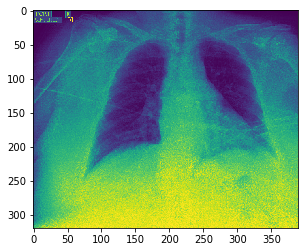

In [0]:
imgtest = mpimg.imread(os.path.join('/tmp/',train_label['Path'][pic_idx]))
plt.imshow(imgtest)


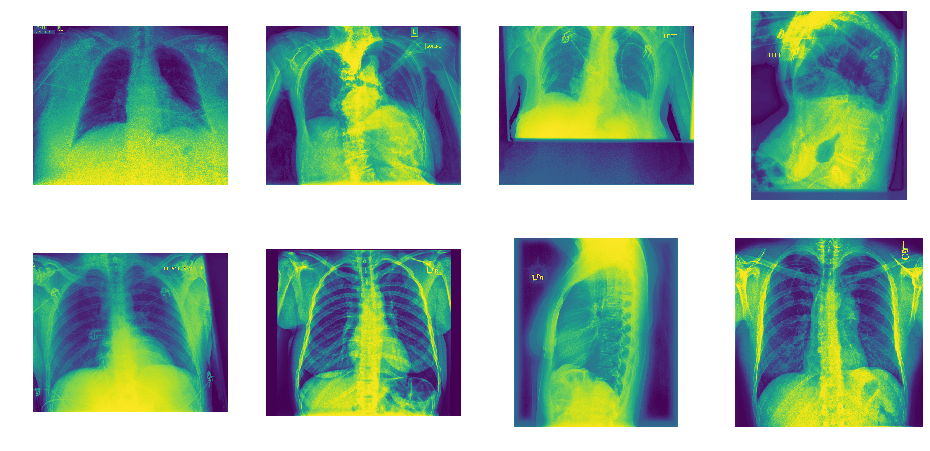

In [0]:
fig = plt.gcf()

fig.set_size_inches(ncol * 4, nrow * 4)

pic_idx += 8

nxt_xray_pic = [os.path.join('/tmp/', fname)
                             for fname in train_label['Path'][pic_idx - 8: pic_idx]]

                             


for i, img_path in enumerate(nxt_xray_pic):
  
    # set up subplot; subplot index starts @ 1
    sp = plt.subplot(nrow, ncol, i + 1)
    sp.axis('Off') # turn off showing axes, gridlines
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
plt.show()

https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

In [0]:
y = train_label.columns[1:len(train_label.columns)]
y=list(y)
y

['No Finding',
 'Enlarged Cardiomediastinum',
 'Cardiomegaly',
 'Lung Opacity',
 'Lung Lesion',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Pleural Effusion',
 'Pleural Other',
 'Fracture',
 'Support Devices']

In [0]:
import numpy as np
import os
import pandas as pd
from keras.utils import Sequence
from PIL import Image
from skimage.transform import resize


class AugmentedImageSequence(Sequence):
    """
    Thread-safe image generator with imgaug support
    For more information of imgaug see: https://github.com/aleju/imgaug
    """

    def __init__(self, dataset_csv_file, class_names, source_image_dir, batch_size=16,
                 target_size=(224, 224), augmenter=None, verbose=0, steps=None,
                 shuffle_on_epoch_end=True, random_state=1):
        """
        :param dataset_csv_file: str, path of dataset csv file
        :param class_names: list of str
        :param batch_size: int
        :param target_size: tuple(int, int)
        :param augmenter: imgaug object. Do not specify resize in augmenter.
                          It will be done automatically according to input_shape of the model.
        :param verbose: int
        """
        self.dataset_df = pd.read_csv(dataset_csv_file)
        self.source_image_dir = source_image_dir
        self.batch_size = batch_size
        self.target_size = target_size
        self.augmenter = augmenter
        self.verbose = verbose
        self.shuffle = shuffle_on_epoch_end
        self.random_state = random_state
        self.class_names = class_names
        self.prepare_dataset()
        if steps is None:
            self.steps = int(np.ceil(len(self.x_path) / float(self.batch_size)))
        else:
            self.steps = int(steps)

    def __bool__(self):
        return True

    def __len__(self):
        return self.steps

    def __getitem__(self, idx):
        batch_x_path = self.x_path[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = np.asarray([self.load_image(x_path) for x_path in batch_x_path])
        batch_x = self.transform_batch_images(batch_x)
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

    def load_image(self, image_file):
        image_path = os.path.join(self.source_image_dir, image_file)
        image = Image.open(image_path)
        image_array = np.asarray(image.convert("RGB"))
        image_array = image_array / 255.
        image_array = resize(image_array, self.target_size)
        return image_array

    def transform_batch_images(self, batch_x):
        if self.augmenter is not None:
            batch_x = self.augmenter.augment_images(batch_x)
        imagenet_mean = np.array([0.485, 0.456, 0.406])
        imagenet_std = np.array([0.229, 0.224, 0.225])
        batch_x = (batch_x - imagenet_mean) / imagenet_std
        return batch_x

    def get_y_true(self):
        """
        Use this function to get y_true for predict_generator
        In order to get correct y, you have to set shuffle_on_epoch_end=False.
        """
        if self.shuffle:
            raise ValueError("""
            You're trying run get_y_true() when generator option 'shuffle_on_epoch_end' is True.
            """)
        return self.y[:self.steps*self.batch_size, :]

    def prepare_dataset(self):
        df = self.dataset_df.sample(frac=1., random_state=self.random_state)
        df.fillna(0, inplace=True)
        self.x_path, self.y = df["Path"].as_matrix(), df[self.class_names].as_matrix()

    def on_epoch_end(self):
        if self.shuffle:
            self.random_state += 1
            self.prepare_dataset()

In [0]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator 
#datagen=ImageDataGenerator(rescale=1./255)



#train_generator=datagen.flow_from_dataframe(
#    dataframe=info_train, 
#    directory=None,
#    x_col="Path", 
#    y_col=y, class_mode="raw", #"input
#    target_size=(32,32), 
#    batch_size=32)


In [0]:
#train_generator=datagen.flow_from_dataframe(
#    dataframe=info_train, 
#    directory=None,
#    x_col="Path", 
#    y_col=y, class_mode="categorical", 
#    target_size=(32,32), 
#    batch_size=32)

In [0]:
from imgaug import augmenters as iaa

augmenter = iaa.Sequential(
    [
        iaa.Fliplr(0.5),
    ],
    random_order=True,
)




In [0]:
class_names='No_Finding,Enlarged_Cardiomediastinum,Cardiomegaly,Lung_Opacity,Lung_Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural_Effusion,Pleural_Other,Fracture,Support_Devices'.split(",")

# Specifying model

In [0]:
import importlib
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model

class ModelFactory:
    """
    Model facotry for Keras default models
    """

    def __init__(self):
        self.models_ = dict(
            VGG16=dict(
                input_shape=(224, 224, 3),
                module_name="vgg16",
                last_conv_layer="block5_conv3",
            ),
            VGG19=dict(
                input_shape=(224, 224, 3),
                module_name="vgg19",
                last_conv_layer="block5_conv4",
            ),
            DenseNet121=dict(
                input_shape=(224, 224, 3),
                module_name="densenet",
                last_conv_layer="bn",
            ),
            ResNet50=dict(
                input_shape=(224, 224, 3),
                module_name="resnet50",
                last_conv_layer="activation_49",
            ),
            InceptionV3=dict(
                input_shape=(299, 299, 3),
                module_name="inception_v3",
                last_conv_layer="mixed10",
            ),
            InceptionResNetV2=dict(
                input_shape=(299, 299, 3),
                module_name="inception_resnet_v2",
                last_conv_layer="conv_7b_ac",
            ),
            NASNetMobile=dict(
                input_shape=(224, 224, 3),
                module_name="nasnet",
                last_conv_layer="activation_188",
            ),
            NASNetLarge=dict(
                input_shape=(331, 331, 3),
                module_name="nasnet",
                last_conv_layer="activation_260",
            ),
        )


    def get_last_conv_layer(self, model_name):
        return self.models_[model_name]["last_conv_layer"]

    def get_input_size(self, model_name):
        return self.models_[model_name]["input_shape"][:2]

    def get_model(self, class_names, model_name="DenseNet121", use_base_weights=True,
                  weights_path=None, input_shape=None):

        if use_base_weights is True:
            base_weights = "imagenet"
        else:
            base_weights = None

        base_model_class = getattr(
            importlib.import_module(
                "keras.applications." + self.models_[model_name]['module_name']
            ),
            model_name)

        if input_shape is None:
            input_shape = self.models_[model_name]["input_shape"]

        img_input = Input(shape=input_shape)

        base_model = base_model_class(
            include_top=False,
            input_tensor=img_input,
            input_shape=input_shape,
            weights=base_weights,
            pooling="avg")
        x = base_model.output
        predictions = Dense(len(class_names), activation="sigmoid", name="predictions")(x)
        model = Model(inputs=img_input, outputs=predictions)

        if weights_path == "":
            weights_path = None

        if weights_path is not None:
            print("load model weights_path: {weights_path}")
            model.load_weights(weights_path)
        return model



In [0]:
# py2 - py3 compatibility settings
from __future__ import absolute_import, division, print_function, unicode_literals
from six.moves import xrange
# build-in libraries
import os
import pdb
# installed libraries
import numpy as np
import tensorflow as tf

slim = tf.contrib.slim

def cifar_arg_scope(weight_decay=1e-4):
    weights_regularizer = tf.contrib.layers.l2_regularizer(weight_decay)
    weights_initializer = tf.contrib.layers.xavier_initializer(uniform=False)
    batch_norm_params = {
        'decay': 0.9,
        'epsilon': 1e-5,
        'activation_fn': tf.nn.relu,
        'fused': True
    }
    variable_params = {
        'initializer': weights_initializer,
        'regularizer': weights_regularizer
    }
    with slim.arg_scope([slim.conv2d],
                        activation_fn=None,
                        biases_initializer=None,
                        weights_initializer=weights_initializer,
                        weights_regularizer=weights_regularizer):
        with slim.arg_scope([slim.batch_norm], **batch_norm_params):
            with slim.arg_scope([slim.variable], **variable_params) as sc:
                return sc

class CondenseNet:

    def __init__(self,
            num_batches, total_ep,
            stages=[14, 14, 14],
            growth=[8, 16, 32],
            bottleneck=4,
            num_groups=4,
            condense_factor=4,
            num_classes=10):

        self.num_batches = num_batches
        self.total_ep = total_ep
        self.stages = stages
        self.growth = growth
        self.bottleneck = bottleneck
        self.num_groups = num_groups
        self.condense_factor = condense_factor
        self.num_classes = num_classes

        self.n_stages = len(self.stages)

    def forward(self, inputs):
        # Init conv (stem)
        net = slim.conv2d(inputs, num_outputs=2 * self.growth[0], kernel_size=3, scope='init_conv')    # (n, h, w, 16)

        # Stages
        for i in xrange(self.n_stages):
            with tf.variable_scope('block_{}'.format(i)):
                net = self.dense_block(net, i)

        net = tf.squeeze(net, axis=[1, 2])
        # Classifier
        with tf.variable_scope('classifier'):
            logits = slim.fully_connected(net, self.num_classes, activation_fn=None)
            predictions = tf.argmax(logits, axis=-1)
        return logits, predictions

    def dense_block(self, net, i):

        last = (i == self.n_stages - 1)

        for j in xrange(self.stages[i]):
            curr_net = net
            net = self.dense_layer(net, self.growth[i], j)
            net = tf.concat([net, curr_net], axis=-1)

        if not last:
            net = slim.avg_pool2d(net, 2, scope='avg_pool')
        else:
            n, h, w, c = net.shape
            net = slim.batch_norm(net, scope='bn-relu')
            net = slim.avg_pool2d(net, [h, w], stride=[h, w], scope='global-avg_pool')

        return net

    def dense_layer(self, net, growth_rate, j):

        # 1x1 learned group conv
        net = slim.batch_norm(net, scope='bn-relu-lgc-{}'.format(j))
        net = self.learned_group_conv(net, self.bottleneck * growth_rate, scope='lgc-{}'.format(j))
        #net = slim.conv2d(net, self.bottleneck * growth_rate, 1, scope='1x1conv-{}'.format(j))

        # 3x3 standard group conv
        net = slim.batch_norm(net, scope='bn-relu-sgc-{}'.format(j))
        net = self.standard_group_conv(net, growth_rate, scope='sgc-{}'.format(j))
        #net = slim.conv2d(net, growth_rate, 3, scope='3x3conv-{}'.format(j))

        return net

    def learned_group_conv(self, net, num_outputs, kernel_size=1, scope='lgc'):
        # 1x1 learned group conv
        _, _, _, num_inputs = net.shape
        curr_iter = tf.train.get_or_create_global_step()
        condensing_stages = self.num_batches * self.total_ep // (2 * (self.condense_factor - 1))
        stage = curr_iter+1 // condensing_stages

        with tf.variable_scope(scope):
            conv_weights = slim.variable('weights', shape=[1, 1, num_inputs, num_outputs])
            mask = tf.get_variable('mask', shape=conv_weights.shape, trainable=False, initializer=tf.constant_initializer(1))

            def pruning():

                weights = tf.squeeze(tf.abs(conv_weights * mask))
                w_in, w_out = weights.shape
                d_out = int(w_out // self.num_groups)
                delta = int(w_in // self.condense_factor)

                # shuffle
                weights = tf.reshape(weights, [w_in, d_out, self.num_groups])
                weights = tf.transpose(weights, [0, 2, 1])
                weights = tf.reshape(weights, [w_in, w_out])

                control_ops = []
                for i in xrange(self.num_groups):
                    wi = weights[:, i * d_out:(i+1) * d_out]  # (w_in, d_out)
                    wis = tf.reduce_sum(wi, axis=-1)    # (w_in,)
                    _, indices = tf.nn.top_k(wis * -1, k=tf.cast(stage*delta, tf.int32))

                    for j in xrange(delta):
                        indice = indices[tf.cast((stage-1)*delta + j, tf.int32)]
                        op = mask[:, :, indice, i::self.num_groups].assign(np.zeros([1, 1, d_out]))
                        control_ops.append(op)

                with tf.control_dependencies(control_ops):
                    return tf.identity(mask)

            #mask = tf.cond(tf.logical_or(tf.equal(stage, 1.0), tf.equal(stage, 2.0)),
            #    true_fn=pruning, false_fn=lambda: tf.identity(mask)
            #)
            mask = tf.cond(tf.logical_and(
                    tf.equal(tf.mod(curr_iter+1, condensing_stages), 0),
                    tf.less(curr_iter+1 // condensing_stages, self.condense_factor)
                ), true_fn=pruning, false_fn=lambda: tf.identity(mask)
            )

            masked_conv_weights = conv_weights * mask
            net = tf.nn.conv2d(net, masked_conv_weights, [1, 1, 1, 1], 'SAME')

        return net

    def standard_group_conv(self, net, num_outputs, kernel_size=3, scope='sgc'):

        n, h, w, c = net.shape

        with tf.variable_scope(scope):
            net_splits = tf.split(net, [int(c // self.num_groups)] * self.num_groups, axis=-1)
            net = [slim.conv2d(net_split, num_outputs // self.num_groups, kernel_size) for net_split in net_splits]
            net = tf.concat(net, axis=-1)   # (n, h, w, num_outputs)

        return net


In [0]:
image_dimension=32
model_factory = ModelFactory()
model_weights_file = ""

#base model name
#one of: VGG16, VGG19, DenseNet121, ResNet50, InceptionV3, InceptionResNetV2,
#NASNetMobile, NASNetLarge
base_model_name="DenseNet121"

#note that the best weighting will be saved as best_weights.h5
#output_weights_name=weights.h5

#model_weights_file = os.path.join(output_dir, "best_" + output_weights_name)

#model_weights_file = os.path.join(output_dir, output_weights_name)

model = model_factory.get_model(
    y,
    model_name=base_model_name,
    use_base_weights=True,
    weights_path=model_weights_file,
    input_shape=(image_dimension, image_dimension, 3))

W0705 08:28:19.703371 140463213344640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 08:28:19.705687 140463213344640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 08:28:19.730824 140463213344640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 08:28:19.789754 140463213344640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0705 08:28:19.790894 1404632133

29089792/29084464 [==============================] - 1s 0us/step


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
import json
import keras.backend as kb
import numpy as np
import os
import shutil
import warnings
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score


class MultipleClassAUROC(Callback):
    """
    Monitor mean AUROC and update model
    """
    def __init__(self, sequence, class_names, weights_path, stats=None, workers=1):
        super(Callback, self).__init__()
        self.sequence = sequence
        self.workers = workers
        self.class_names = class_names
        self.weights_path = weights_path
        self.best_weights_path = os.path.join(
            os.path.split(weights_path)[0],
            "best_{os.path.split(weights_path)[1]}",
        )
        self.best_auroc_log_path = os.path.join(
            os.path.split(weights_path)[0],
            "best_auroc.log",
        )
        self.stats_output_path = os.path.join(
            os.path.split(weights_path)[0],
            ".training_stats.json"
        )
        # for resuming previous training
        if stats:
            self.stats = stats
        else:
            self.stats = {"best_mean_auroc": 0}

        # aurocs log
        self.aurocs = {}
        for c in self.class_names:
            self.aurocs[c] = []

    def on_epoch_end(self, epoch, logs={}):
        """
        Calculate the average AUROC and save the best model weights according
        to this metric.
        """
        print("\n*********************************")
        self.stats["lr"] = float(kb.eval(self.model.optimizer.lr))
        print("current learning rate: {self.stats['lr']}")

        """
        y_hat shape: (#samples, len(class_names))
        y: [(#samples, 1), (#samples, 1) ... (#samples, 1)]
        """
        y_hat = self.model.predict_generator(self.sequence, workers=self.workers)
        y = self.sequence.get_y_true()

        print("*** epoch#{epoch + 1} dev auroc ***")
        current_auroc = []
        for i in range(len(self.class_names)):
            try:
                score = roc_auc_score(y[:, i], y_hat[:, i])
            except ValueError:
                score = 0
            self.aurocs[self.class_names[i]].append(score)
            current_auroc.append(score)
            print("{i+1}. {self.class_names[i]}: {score}")
        print("*********************************")

        # customize your multiple class metrics here
        mean_auroc = np.mean(current_auroc)
        print("mean auroc: {mean_auroc}")
        if mean_auroc > self.stats["best_mean_auroc"]:
            print("update best auroc from {self.stats['best_mean_auroc']} to {mean_auroc}")

            # 1. copy best model
            shutil.copy(self.weights_path, self.best_weights_path)

            # 2. update log file
            print("update log file: {self.best_auroc_log_path}")
            with open(self.best_auroc_log_path, "a") as f:
                f.write("(epoch#{epoch + 1}) auroc: {mean_auroc}, lr: {self.stats['lr']}\n")

            # 3. write stats output, this is used for resuming the training
            with open(self.stats_output_path, 'w') as f:
                json.dump(self.stats, f)

            print("update model file: {self.weights_path} -> {self.best_weights_path}")
            self.stats["best_mean_auroc"] = mean_auroc
            print("*********************************")
        return


class MultiGPUModelCheckpoint(Callback):
    """
    Checkpointing callback for multi_gpu_model
    copy from https://github.com/keras-team/keras/issues/8463
    """
    def __init__(self, filepath, base_model, monitor='val_loss', verbose=0,
                 save_best_only=False, save_weights_only=False,
                 mode='auto', period=1):
        super(Callback, self).__init__()
        self.base_model = base_model
        self.monitor = monitor
        self.verbose = verbose
        self.filepath = filepath
        self.save_best_only = save_best_only
        self.save_weights_only = save_weights_only
        self.period = period
        self.epochs_since_last_save = 0

        if mode not in ['auto', 'min', 'max']:
            warnings.warn('ModelCheckpoint mode %s is unknown, '
                          'fallback to auto mode.' % (mode),
                          RuntimeWarning)
            mode = 'auto'

        if mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf
        elif mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf
        else:
            if 'acc' in self.monitor or self.monitor.startswith('fmeasure'):
                self.monitor_op = np.greater
                self.best = -np.Inf
            else:
                self.monitor_op = np.less
                self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('Epoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            self.base_model.save_weights(filepath, overwrite=True)
                        else:
                            self.base_model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('Epoch %05d: %s did not improve' %
                                  (epoch + 1, self.monitor))
            else:
                if self.verbose > 0:
                    print('Epoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.base_model.save_weights(filepath, overwrite=True)
                else:
                    self.base_model.save(filepath, overwrite=True)

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
output_weights_name="weights.h5"
output_dir='/tmp/CheXpert-v1.0-small/'
output_weights_path = os.path.join(output_dir, output_weights_name)

checkpoint = ModelCheckpoint(
                 output_weights_path,
                 save_weights_only=True,
                 save_best_only=True,
                 verbose=1,
            )


# Training model

In [0]:
def get_sample_counts(output_dir, dataset, class_names):
    """
    Get total and class-wise positive sample count of a dataset
    Arguments:
    output_dir - str, folder of dataset.csv
    dataset - str, train|dev|test
    class_names - list of str, target classes
    Returns:
    total_count - int
    class_positive_counts - dict of int, ex: {"Effusion": 300, "Infiltration": 500 ...}
    """
    df = pd.read_csv(os.path.join(output_dir, dataset + ".csv"))
    total_count = df.shape[0]
    labels = df[class_names].as_matrix()
    positive_counts = np.sum(labels, axis=0)
    class_positive_counts = dict(zip(class_names, positive_counts))
    return total_count, class_positive_counts

In [0]:


batch_size=32
image_dimension=32
epochs=100

train_counts, train_pos_counts = get_sample_counts(output_dir, "train_label", y)
valid_counts, _ = get_sample_counts(output_dir, "valid_label", y)

train_steps = int(train_counts / batch_size)
valid_steps = int(valid_counts / batch_size)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
from keras.utils import multi_gpu_model

#gpus = len(os.getenv("CUDA_VISIBLE_DEVICES", "1").split(","))
#model = multi_gpu_model(model, gpus)
initial_learning_rate=0.001


from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)


from keras.optimizers import Adam

optimizer = Adam(lr=initial_learning_rate)
#model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['acc', auroc])
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['acc'])
#model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy', 'f1score', 'precision', 'recall'])
#'f1measure',,'binary_accuracy', 'precision', 'recall']


#using custom metrics
#import keras.backend as K

#def mean_pred(y_true, y_pred):
#    return K.mean(y_pred)

#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['accuracy', mean_pred])

train_steps = int(train_counts / batch_size)# Training 

In [0]:
train_generator = AugmentedImageSequence(
            dataset_csv_file='/tmp/CheXpert-v1.0-small/train_label.csv',
            class_names=y,
            source_image_dir='',
            batch_size=batch_size,
            target_size=(image_dimension, image_dimension),
            augmenter=augmenter,
            #augmenter=None,
            steps=train_steps,
            #steps=200,
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:

valid_generator = AugmentedImageSequence(
    dataset_csv_file='/tmp/CheXpert-v1.0-small/valid_label.csv',
    class_names=y,
    source_image_dir='',
    batch_size=batch_size,
    target_size=(image_dimension, image_dimension),
    augmenter=augmenter,
    #augmenter=None,
    steps=valid_steps,
    #steps=200,
    shuffle_on_epoch_end=False,
)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:


training_stats = {}
generator_workers=8
patience_reduce_lr=1
min_lr=1e-8


auroc = MultipleClassAUROC(
    sequence=valid_generator,
    class_names=y,
    weights_path=output_weights_path,
    stats=training_stats,
    workers=generator_workers,
)

callbacks = [
    checkpoint,
    TensorBoard(log_dir=os.path.join(output_dir, "logs"), batch_size=batch_size),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience_reduce_lr,
                      verbose=1, mode="min", min_lr=min_lr),
    auroc,
]

In [0]:
import numpy as np


def get_class_weights(total_counts, class_positive_counts, multiply):
    """
    Calculate class_weight used in training
    Arguments:
    total_counts - int
    class_positive_counts - dict of int, ex: {"Effusion": 300, "Infiltration": 500 ...}
    multiply - int, positve weighting multiply
    use_class_balancing - boolean 
    Returns:
    class_weight - dict of dict, ex: {"Effusion": { 0: 0.01, 1: 0.99 }, ... }
    """
    def get_single_class_weight(pos_counts, total_counts):
        denominator = (total_counts - pos_counts) * multiply + pos_counts
        return {
            0: pos_counts / denominator,
            1: (denominator - pos_counts) / denominator,
        }

    class_names = list(class_positive_counts.keys())
    label_counts = np.array(list(class_positive_counts.values()))
    class_weights = []
    for i, class_name in enumerate(class_names):
        class_weights.append(get_single_class_weight(label_counts[i], total_counts))

    return class_weights



In [0]:
#this variable controlls the class_weight ratio between 0 and 1
#higher value means higher weighting of positive samples

positive_weights_multiply=1

class_weights = get_class_weights(
    train_counts,
    train_pos_counts,
    multiply=positive_weights_multiply,
)


In [0]:



history = model.fit_generator(
            generator=train_generator,
            steps_per_epoch=train_steps,
            epochs=5,
            validation_data=valid_generator,
            validation_steps=valid_steps,
            #callbacks=callbacks,
            class_weight=class_weights,
            #workers=generator_workers,
            shuffle=False,
        )

Epoch 1/5
6980/6981 [============================>.] - ETA: 1s - loss: 0.1159 - acc: 0.8067

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


6981/6981 [==============================] - 9526s 1s/step - loss: 0.1159 - acc: 0.8067 - val_loss: 1.4373 - val_acc: 0.7950
Epoch 2/5
   9/6981 [..............................] - ETA: 3:02:23 - loss: 0.1448 - acc: 0.8165

In [0]:
import tensorflow as tf

sess = tf.Session()

#Initialising writer for TensorBoard

#tf.summary.FileWriter(n) - python class that writes data for TensorBoard

writer = tf.summary.FileWriter("/tmp/CheXpert-v1.0-small/TB")
writer.add_graph(sess.graph)
!tensorboard --logdir /tmp/CheXpert-v1.0-small/TB

In [5]:
# Run Tensorboard in the background
LOGDIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOGDIR)
)
# Use ngrok to tunnel traffic to localhost
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 6006 &')
# Retrieve public url
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-07-07 15:09:41--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.71.139.107, 54.236.200.27, 34.226.180.131, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.71.139.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17556757 (17M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  16.74M  20.3MB/s    in 0.8s    

2019-07-07 15:09:42 (20.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [17556757/17556757]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://b220eee3.ngrok.io


In [0]:
!pip install tensorboardcolab
#Initialization

tbc=TensorBoardColab()
#Save picture to TensorBoard

#tbc.save_image(title=”test_title”, image=image)
#tbc.save_value(“graph_name”, “line_name”, epoch, value)
#tbc.save_value(“graph_name2”, “line_name2”, epoch, value2)
#tbc.flush_line(line_name)
#tbc.flush_line(line_name2)
#tbc.close()

NameError: ignored

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


In [0]:
import matplotlib.pyplot as plt
colormap_r = ListedColormap(colormap.colors[::-1])

val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Traning acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure

NameError: ignored

# Saving Model

In [0]:
# Serialising (saving) model --> needed for deployment eg: TF Serving
#model.save('/path/to/model', save_format = 'tf') # TF saved model format

# TF Lite Converter -- converts saved to mobile version TF Lite Model

#loaded_model = tf.keras.models.load_model('/path/to/model')

# Running the model

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300, 300)) # must match input dimensions of model
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  
  if classes[0] > 0.5:
    
    print(fn + "is a human")
  else:
    print(fn + "is a horse")

Saving download (1).jpeg to download (1).jpeg
[1.]
download (1).jpegis a human


# Visualisation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


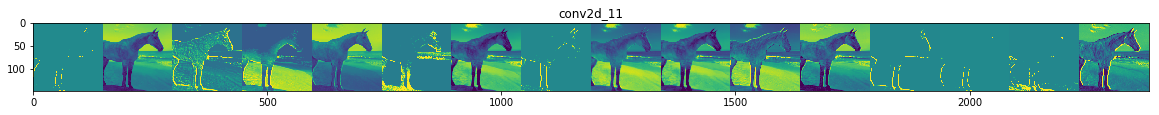

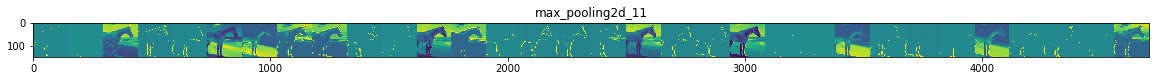

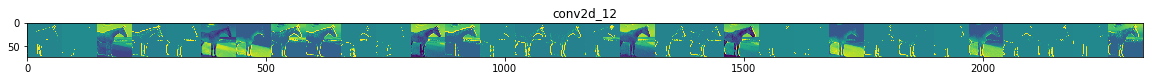

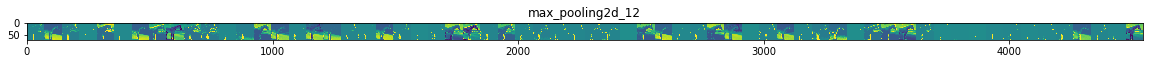

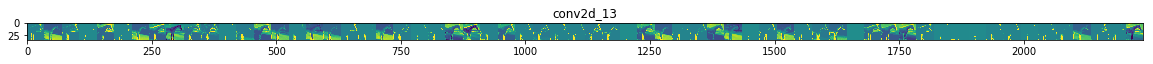

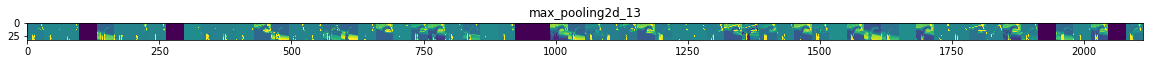

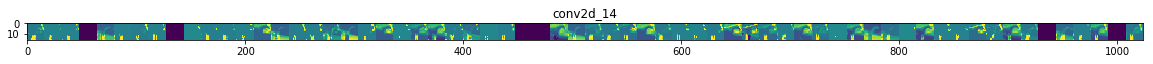

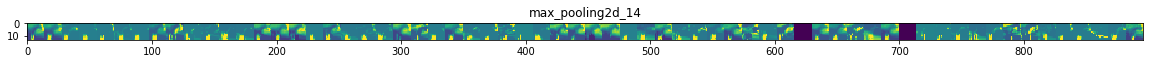

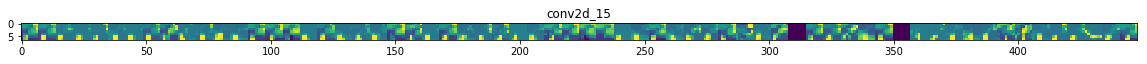

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# visualise learnt represenations

# the first

successive_outputs = [ layer.output for layer in model.layers[1: ] ]

# visualization_model = Model( img_input, successive_outputs)

vis_model = tf.keras.models.Model( inputs = model.input, outputs = successive_outputs )

# Peparing rnd input from training

horse_img_files = [os.path.join(train_horse_dir, f ) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f ) for f in train_human_names]
img_path =  random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size = (300, 300)) # Python Imaging Library (PIL) format image
x = img_to_array(img) # np.array shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # np.array shape (1, 150, 150, 3)
               
# Rescale by 1/255
x /= 255

# Running through network --> obtain representations 
successive_feature_maps = vis_model.predict(x)
layer_names = [layer.name for layer in model.layers]

# Display resentations
for layer_name, feature_map in zip(layer_names, successive_feature_maps): 
               if len(feature_map.shape) == 4:
                  # applies to conv/ max pooling layer, not fully-connected
                  n_features = feature_map.shape[-1]
                  # the feature map has shape (1,size, size, n_features)
                  size = feature_map.shape[1]
                  
                  # titling images in matrix
                  display_grid = np.zeros((size, size * n_features))
                  for i in range(n_features):
                      # postprocess feature visualization
                      x = feature_map[0, :, :, i]
                      x -= x.mean()
                      x /= x.std()
                      x *= 64
                      x += 128
                      x = np.clip(x, 0,  255).astype('uint8')
                      # tiling as horizontal grid
                      display_grid[ :, i*size : (i + 1)*size] = x
                      #displat grid
                  scale = 20./ n_features
                  plt.figure(figsize = (scale * n_features, scale))
                  plt.title(layer_name)
                  plt.grid(False)
                  plt.imshow(display_grid,  aspect = 'auto', cmap = 'viridis')



# Killing kernal to free up memory

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)